In [51]:
import numpy as np
import pandas as pd

# 1) Pre-Processing 

In [52]:
user_data=pd.read_csv('application_record.csv')
record=pd.read_csv('credit_record.csv')

In [53]:
user_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [54]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## 1.1) Setting up a Target binary value

In [55]:
record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [56]:
record=record.replace({"STATUS":{'X':-1,'C':-1}})

In [57]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,-1


In [58]:
record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [59]:
record['STATUS']=record['STATUS'].astype('int64')

In [60]:
record.dtypes

ID                int64
MONTHS_BALANCE    int64
STATUS            int64
dtype: object

In [61]:
record['STATUS']=record['STATUS']+1

In [62]:
record=record.groupby('ID').max('STATUS') 
record.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,1
5001712,0,1
5001713,0,0
5001714,0,0
5001715,0,0


In [63]:
record=pd.merge(user_data,record,how='inner',on='ID')
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0


In [64]:
record.loc[record['STATUS']<=0,'STATUS']=0
record.loc[record['STATUS']>0,'STATUS']=1  # on or off
record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,1


In [65]:
list(record['CODE_GENDER'].unique())

['M', 'F']

In [66]:
# !conda install nbimporter
from function_file import change_to_bi # execute this code, if not installed : !pip install ipynb
# from ipynb.fs.full.function_file import change_to_bi

In [67]:
change_to_bi(record,'CODE_GENDER')
change_to_bi(record,'FLAG_OWN_CAR')
change_to_bi(record,'FLAG_OWN_REALTY')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,1
36453,5149834,1,1,0,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
36454,5149838,1,1,0,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
36455,5150049,1,1,0,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,1


In [68]:
record['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [69]:
# Old Method (ignore)
# user_data['CODE_GENDER']=user_data['CODE_GENDER'].replace(['M','F'],[0,1])
# user_data=user_data.replace({'FLAG_OWN_CAR':{'Y':1,'N':0}})
# user_data=user_data.replace({'FLAG_OWN_REALTY':{'Y':1,'N':0}})

In [70]:
user_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [71]:
from function_file import change_to_num # execute this code, if not installed : !pip install ipynb

In [72]:
change_to_num(record,'NAME_INCOME_TYPE')
change_to_num(record,'NAME_EDUCATION_TYPE')
change_to_num(record,'NAME_FAMILY_STATUS')
change_to_num(record,'NAME_HOUSING_TYPE')
change_to_num(record,'OCCUPATION_TYPE')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
1,5008805,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,0,1
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0,1
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2.0,0,1
36453,5149834,1,1,0,0,157500.0,1,0,1,1,-12387,-1325,1,0,1,1,13,2.0,0,1
36454,5149838,1,1,0,0,157500.0,2,0,1,1,-12387,-1325,1,0,1,1,13,2.0,0,1
36455,5150049,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2.0,0,1


In [73]:
# old method ( ignore it)
# user_data['NAME_INCOME_TYPE'].unique()
# user_data['NAME_INCOME_TYPE']=user_data['NAME_INCOME_TYPE'].replace(list(user_data['NAME_INCOME_TYPE'].unique()),list(range(0,len(user_data['NAME_INCOME_TYPE'].unique()))))

In [74]:
# old method ( ignore it)
# user_data['NAME_EDUCATION_TYPE'].unique()
# user_data=user_data.replace({'NAME_EDUCATION_TYPE':{'Higher education':0,'Secondary / secondary special':1,'Incomplete higher':2,'Lower secondary':3,'Academic degree':4}})

In [75]:
# old method ( ignore it)
# user_data['NAME_FAMILY_STATUS'].unique()
# user_data=user_data.replace({'NAME_FAMILY_STATUS':{'Civil marriage':0,'Married':1,'Single / not married':2,'Separated':3,'Widow':4}})

In [76]:
# old method ( ignore it)
# user_data['NAME_HOUSING_TYPE'].unique()
# user_data['NAME_HOUSING_TYPE']=user_data['NAME_HOUSING_TYPE'].replace(list(user_data['NAME_HOUSING_TYPE'].unique()),list(range(0,len(user_data['NAME_HOUSING_TYPE'].unique()))))

In [77]:
# old method ( ignore it)
# user_data['OCCUPATION_TYPE'].unique()
# user_data['OCCUPATION_TYPE']=user_data['OCCUPATION_TYPE'].replace(list(user_data['OCCUPATION_TYPE'].unique()),list(range(0,len(user_data['OCCUPATION_TYPE'].unique()))))

In [78]:
record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
1,5008805,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,0,1
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0,1
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2.0,0,1
36453,5149834,1,1,0,0,157500.0,1,0,1,1,-12387,-1325,1,0,1,1,13,2.0,0,1
36454,5149838,1,1,0,0,157500.0,2,0,1,1,-12387,-1325,1,0,1,1,13,2.0,0,1
36455,5150049,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2.0,0,1


In [79]:
record=record.drop(['MONTHS_BALANCE','ID'],axis=1)

In [80]:
record.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'STATUS'],
      dtype='object')

In [81]:
record

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,1
1,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,1
2,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,1
3,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,1
4,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2.0,1
36453,1,1,0,0,157500.0,1,0,1,1,-12387,-1325,1,0,1,1,13,2.0,1
36454,1,1,0,0,157500.0,2,0,1,1,-12387,-1325,1,0,1,1,13,2.0,1
36455,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2.0,1


In [82]:
record[record['STATUS']==0]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
4,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0
12,0,0,0,0,135000.0,1,1,1,1,-17778,-1194,1,0,0,0,4,2.0,0
44,1,0,0,2,135000.0,0,1,1,1,-15761,-3173,1,0,0,0,4,4.0,0
55,1,0,0,2,135000.0,0,1,1,1,-15761,-3173,1,0,0,0,4,4.0,0
76,1,1,0,0,297000.0,1,1,2,0,-15519,-3234,1,0,0,0,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36079,0,0,0,2,157500.0,0,1,1,1,-14312,-4480,1,1,1,0,4,4.0,0
36080,1,1,0,0,67500.0,2,1,4,1,-22116,365243,1,0,0,0,0,1.0,0
36091,1,1,0,0,67500.0,2,1,4,1,-22116,365243,1,0,0,0,0,1.0,0
36097,1,0,0,1,112500.0,0,1,1,1,-14234,-309,1,0,0,0,7,3.0,0


In [83]:
record[record['STATUS']==1]


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,1
1,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,0,2.0,1
2,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,1
3,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,1
5,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2.0,1
36453,1,1,0,0,157500.0,1,0,1,1,-12387,-1325,1,0,1,1,13,2.0,1
36454,1,1,0,0,157500.0,2,0,1,1,-12387,-1325,1,0,1,1,13,2.0,1
36455,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2.0,1


In [84]:
record.corr()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
CODE_GENDER,1.000000,0.361379,-0.050758,-0.077690,-0.197805,0.158594,-0.016382,0.125867,-0.053499,-0.202352,0.173434,NaN,-0.064994,0.026833,0.003284,-0.024118,-0.110782,0.004509
FLAG_OWN_CAR,0.361379,1.000000,-0.015185,-0.105839,-0.215506,0.110925,0.077230,0.119062,-0.025786,-0.157144,0.156452,NaN,-0.021644,0.014019,-0.021750,-0.043543,-0.151814,0.004901
FLAG_OWN_REALTY,-0.050758,-0.015185,1.000000,0.000575,-0.032719,-0.049448,0.001004,-0.022472,0.163836,0.129838,-0.093006,NaN,0.207732,0.066601,-0.052194,0.033788,0.005723,-0.002605
CNT_CHILDREN,-0.077690,-0.105839,0.000575,1.000000,0.033691,-0.126058,-0.035329,-0.131353,0.042399,0.339357,-0.229379,NaN,0.048091,-0.016291,0.015960,0.109439,0.889114,0.003842
AMT_INCOME_TOTAL,-0.197805,-0.215506,-0.032719,0.033691,1.000000,-0.012952,-0.178803,-0.006935,-0.003048,0.067908,-0.168611,NaN,-0.037746,0.017245,0.086681,0.057708,0.023750,-0.014412
NAME_INCOME_TYPE,0.158594,0.110925,-0.049448,-0.126058,-0.012952,1.000000,-0.039289,0.079021,-0.026526,-0.346406,0.535658,NaN,-0.183092,-0.009797,-0.021901,-0.159980,-0.123481,-0.000535
NAME_EDUCATION_TYPE,-0.016382,0.077230,0.001004,-0.035329,-0.178803,-0.039289,1.000000,0.005334,-0.015927,-0.066977,0.085730,NaN,0.005763,-0.020322,-0.074474,-0.036825,-0.031904,0.014195
NAME_FAMILY_STATUS,0.125867,0.119062,-0.022472,-0.131353,-0.006935,0.079021,0.005334,1.000000,-0.015167,-0.170975,0.143766,NaN,-0.059966,0.002918,-0.020668,-0.050474,-0.497094,0.003593
NAME_HOUSING_TYPE,-0.053499,-0.025786,0.163836,0.042399,-0.003048,-0.026526,-0.015927,-0.015167,1.000000,0.137401,-0.082201,NaN,0.023633,-0.009420,-0.013272,0.038900,0.031604,-0.005851
DAYS_BIRTH,-0.202352,-0.157144,0.129838,0.339357,0.067908,-0.346406,-0.066977,-0.170975,0.137401,1.000000,-0.616213,NaN,0.179054,-0.028659,0.105625,0.266479,0.304020,-0.002712


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

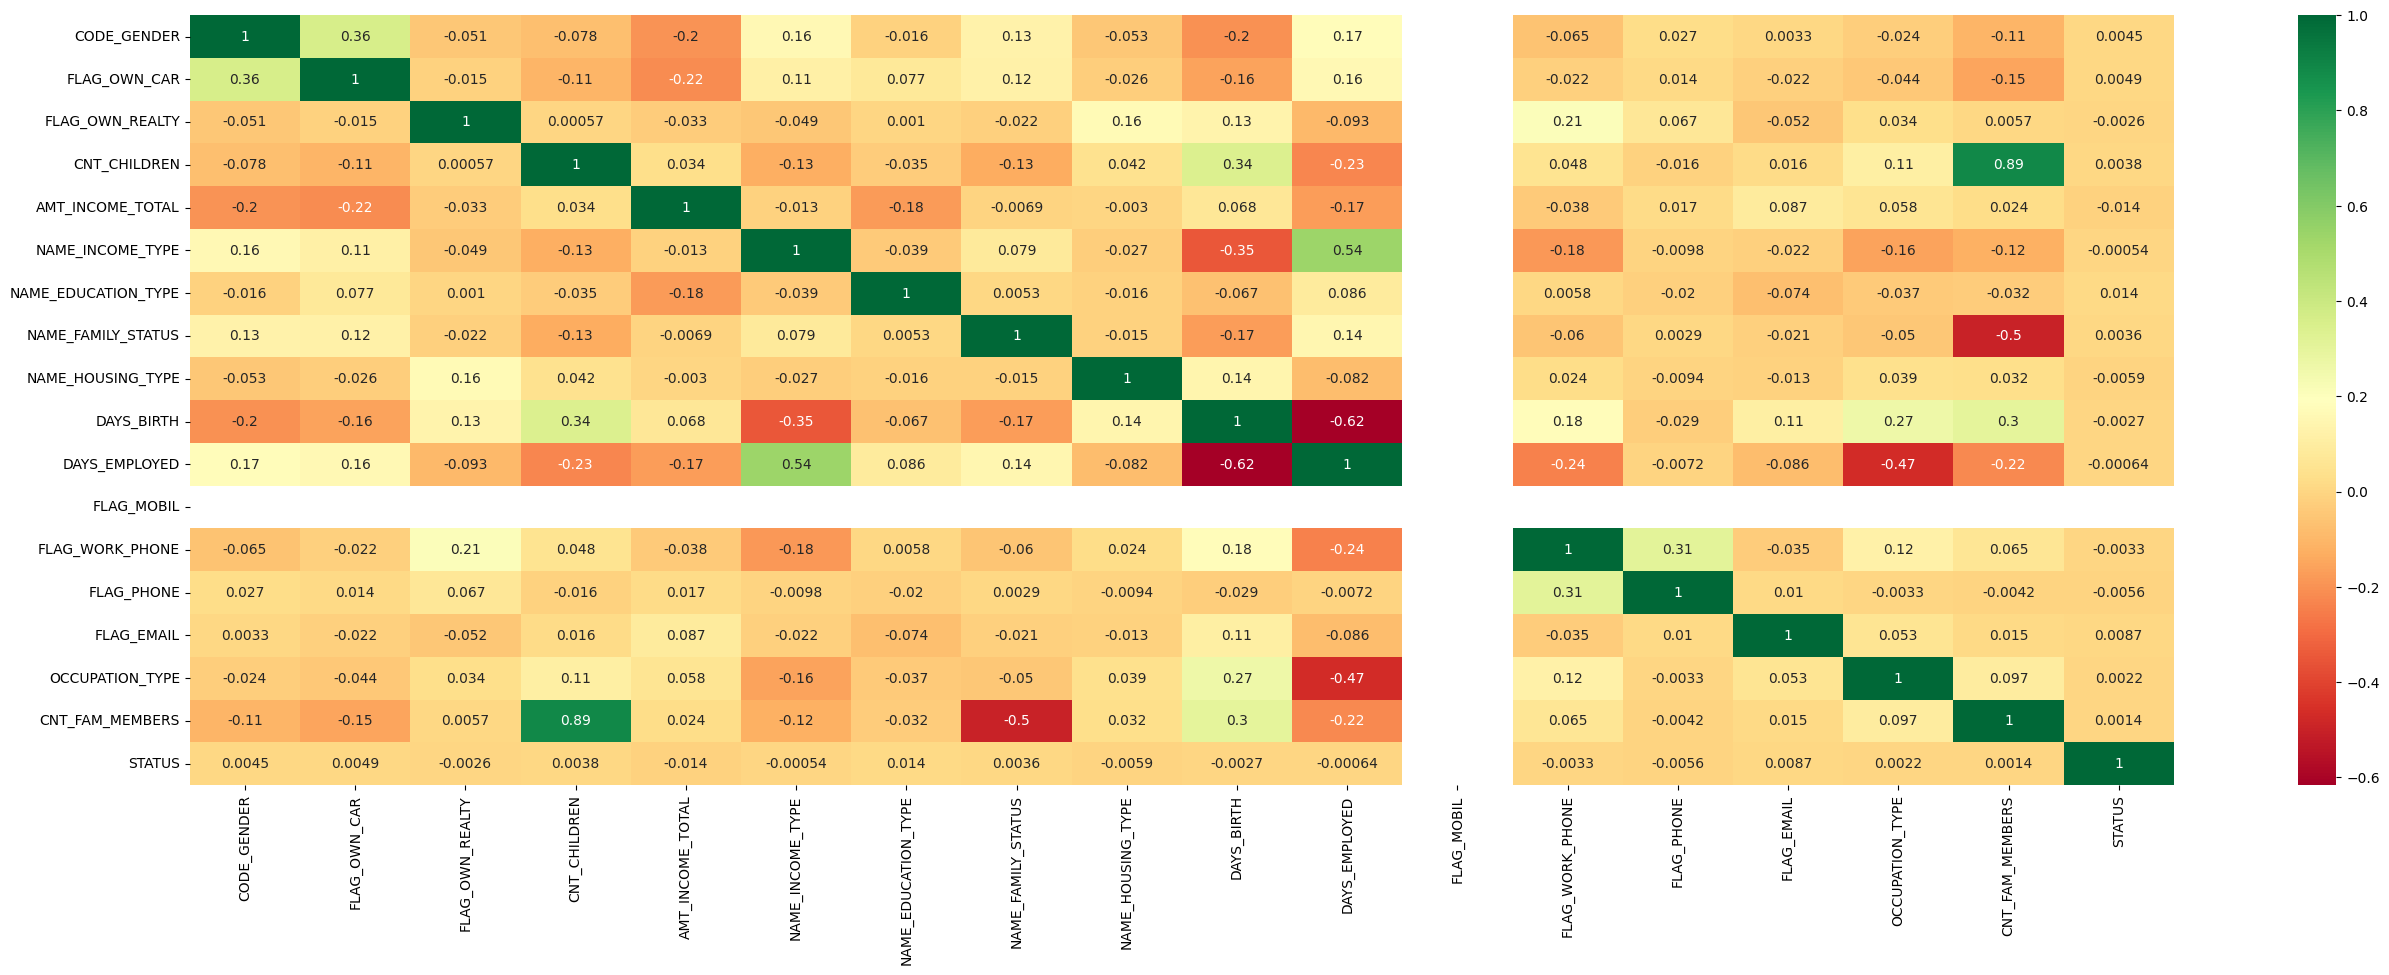

In [86]:
plt.figure(figsize=(32,10))
sns.heatmap(record.corr(),annot=True,cmap='RdYlGn')

In [87]:
X=record[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']]
Y=record[['STATUS']]

In [88]:
from imblearn.combine import SMOTETomek

In [89]:
smk=SMOTETomek(random_state=12)
X,Y=smk.fit_resample(X,Y)

In [90]:
X.shape

(63446, 17)

In [91]:
Y.shape

(63446, 1)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=59562)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn=KNeighborsClassifier(n_neighbors=3)

In [96]:
knn.fit(X_train,Y_train['STATUS'])

KNeighborsClassifier(n_neighbors=3)

In [97]:
knn.score(X_test,Y_test)

C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8304123061404615

In [98]:
# A=knn.predict([[1,1,1,0,600000.0,-18870,-11300,1,1,1,0,2.0]])

In [99]:
# A[0]

In [100]:
Y_pre=knn.predict(X_test)

C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [101]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(Y_test,Y_pre)

In [102]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, Y_pre))
conf

Accuracy :  0.8304123061404615


array([[6423, 1473],
       [1217, 6749]], dtype=int64)

In [103]:
# from sklearn.inspection import permutation_importance
# results = permutation_importance(knn, X, Y, scoring='accuracy')

In [104]:
# results

In [105]:
# results.importances_mean

In [106]:
# record.columns

## Decision Tree 

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtc=DecisionTreeClassifier(criterion="gini")

In [109]:
dtc=dtc.fit(X_train,Y_train)

In [110]:
dtc.score(X_test,Y_test)

0.8860168957256336

In [111]:
Y_pre=dtc.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(Y_test, Y_pre)

0.8860168957256336

In [114]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(Y_test,Y_pre)

In [115]:
conf

array([[7164,  732],
       [1076, 6890]], dtype=int64)

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

##  

## Naive Bayes 

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gnb=GaussianNB()

In [118]:
gnb=gnb.fit(X_train,Y_train)

C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
gnb.score(X_test,Y_test)

0.516580506871769

In [120]:
Y_pre=gnb.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pre)

array([[6211, 1685],
       [5983, 1983]], dtype=int64)